In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [20]:
from collections import Counter

In [2]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [3]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [4]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [5]:
lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') + pd.DateOffset(hours=1)

In [6]:
# # Ausreißer manuell auf np.nan setzen
# WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [7]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [8]:
# nan Auswertung

In [9]:
print('WS100')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.1')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.2')
print('\n')
print('WS300')
fct.nan_nonan_ratio(WS300_rtu, 'precipitation.1')
print('\n')
print('Raine')
fct.nan_nonan_ratio(Raine_rtu, 'Niederschlagsmenge')
print('\n')
print('L_pcp')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_07')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_09')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_10')

WS100
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %


WS300
count of nans: 493811 
length of data: 1575142 
Ratio of nan/nonan: 31.35 %


Raine
count of nans: 193 
length of data: 772077 
Ratio of nan/nonan: 0.02 %


L_pcp
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %


In [10]:
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.1')
print(x)
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.2')
print(x)
print('\n')
x = fct.longest_nan_sequence(WS300_rtu, 'precipitation.1')
print(x)
print('\n')
x = fct.longest_nan_sequence(Raine_rtu, 'Niederschlagsmenge')
print(x)
print('\n')
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_07')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_09')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_10')
print(x)


{'precipitation.1': 3}
{'precipitation.2': 3}


{'precipitation.1': 493798}


{'Niederschlagsmenge': 159}


{'rr_07': 1390}
{'rr_09': 1390}
{'rr_10': 1390}


In [11]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append([count, index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append([count, index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))

    return list

In [12]:
print(list_nan_sequences(WS100_rtu, 'precipitation.1', 0))
print(list_nan_sequences(WS300_rtu, 'precipitation.1', 0))
print(list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 0))
print(list_nan_sequences(L_pcp_rtu, 'rr_07', 5))
print(list_nan_sequences(L_pcp_rtu, 'rr_09', 5))
print(list_nan_sequences(L_pcp_rtu, 'rr_10', 5))

Count of nan sequences with min len 0: 4
[[2, Timestamp('2021-11-05 08:31:00'), Timestamp('2021-11-05 08:32:00')], [1, Timestamp('2021-11-05 08:43:00'), Timestamp('2021-11-05 08:43:00')], [3, Timestamp('2022-11-03 11:10:00'), Timestamp('2022-11-03 11:12:00')], [2, Timestamp('2022-11-21 16:21:00'), Timestamp('2022-11-21 16:22:00')]]
Count of nan sequences with min len 0: 8
[[3, Timestamp('2021-02-24 08:00:00'), Timestamp('2021-02-24 08:06:00')], [2, Timestamp('2021-04-29 11:30:00'), Timestamp('2021-04-29 12:00:00')], [1, Timestamp('2021-09-16 14:59:00'), Timestamp('2021-09-16 14:59:00')], [1, Timestamp('2021-09-27 09:42:00'), Timestamp('2021-09-27 09:42:00')], [2, Timestamp('2021-11-05 08:31:00'), Timestamp('2021-11-05 08:32:00')], [1, Timestamp('2021-11-05 08:43:00'), Timestamp('2021-11-05 08:43:00')], [3, Timestamp('2022-11-03 11:10:00'), Timestamp('2022-11-03 11:12:00')], [493798, Timestamp('2022-11-14 10:49:00'), Timestamp('2023-10-23 08:46:00')]]
Count of nan sequences with min len

In [13]:
def i_nans_before_peak(data, station, quantile):

    # if y == 'pr':
    #     timegap = datetime.timedelta(hours=1)
    # elif y == 'sc':
    #     timegap = datetime.timedelta(minutes=5)

    timegap = datetime.timedelta(minutes=1)

    dataframe = data[station]

    peaks = dataframe[dataframe > dataframe.quantile(quantile)]
    
    for index_peak in peaks.index:
        count = 0
        for i in reversed(dataframe.loc[: index_peak - timegap].isna()):
            if i == True:
                count += 1
            else:
                if count > 0:
                    print(count, 'leading nans before', index_peak)
                    break
                else:
                    # print('no leading nans before', index_peak)
                    break      
    return

In [14]:
# print(i_nans_before_peak(WS100_rtu, 'precipitation.1', 0.9))

In [15]:
# print(i_nans_before_peak(WS300_rtu, 'precipitation.1', 0.9))

In [16]:
# print(i_nans_before_peak(Raine_rtu, 'Niederschlagsmenge', 0.9))

In [17]:
# print(i_nans_before_peak(L_pcp_rtu, 'rr_07', 0.9))
# print(i_nans_before_peak(L_pcp_rtu, 'rr_09', 0.9))
# print(i_nans_before_peak(L_pcp_rtu, 'rr_10', 0.9))

In [18]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append(count) # , index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append(count) # , index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))
    Counter(list)

    return list

In [49]:
WS100_list = list_nan_sequences(WS100_rtu, 'precipitation.1', 1)
WS300_list = list_nan_sequences(WS300_rtu, 'precipitation.1', 1)
Raine_list = list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 1)
rr07_list = list_nan_sequences(L_pcp_rtu, 'rr_07', 1)
rr09_list = list_nan_sequences(L_pcp_rtu, 'rr_09', 1)
rr10_list = list_nan_sequences(L_pcp_rtu, 'rr_10', 1)

Count of nan sequences with min len 1: 4
Count of nan sequences with min len 1: 8
Count of nan sequences with min len 1: 3
Count of nan sequences with min len 1: 32
Count of nan sequences with min len 1: 32
Count of nan sequences with min len 1: 32


In [50]:
lhg05_list = list_nan_sequences(lhg_rtu, 'lhg05', 1)
lhg07_list = list_nan_sequences(lhg_rtu, 'lhg07', 1)
lhg09_list = list_nan_sequences(lhg_rtu, 'lhg09', 1)
lhg10_list = list_nan_sequences(lhg_rtu, 'lhg10', 1)
lhg11_list = list_nan_sequences(lhg_rtu, 'lhg11', 1)

Count of nan sequences with min len 1: 8959
Count of nan sequences with min len 1: 8729
Count of nan sequences with min len 1: 385
Count of nan sequences with min len 1: 7281
Count of nan sequences with min len 1: 5623


In [27]:
counter = Counter(x)

In [28]:
a, b = np.unique(x, return_counts=True)

In [51]:
# counter

In [30]:
counter[17]

1

In [31]:
x_log = np.log(x)

In [52]:
# x_log

In [96]:
# np.percentile(x, 94)

In [36]:
absolute_frequencies = np.unique(x, return_counts=True)

# Berechnen Sie die relative Häufigkeit jeder Kategorie
relative_frequencies = absolute_frequencies[1] / len(x)

print("Absolute Frequencies: ", dict(zip(absolute_frequencies[0], absolute_frequencies[1])))
print("Relative Frequencies: ", dict(zip(absolute_frequencies[0], relative_frequencies)))

Absolute Frequencies:  {1: 15, 2: 4, 3: 3, 4: 1, 5: 3, 6: 1, 10: 1, 17: 1, 36: 1, 1150: 1, 1390: 1}
Relative Frequencies:  {1: 0.46875, 2: 0.125, 3: 0.09375, 4: 0.03125, 5: 0.09375, 6: 0.03125, 10: 0.03125, 17: 0.03125, 36: 0.03125, 1150: 0.03125, 1390: 0.03125}


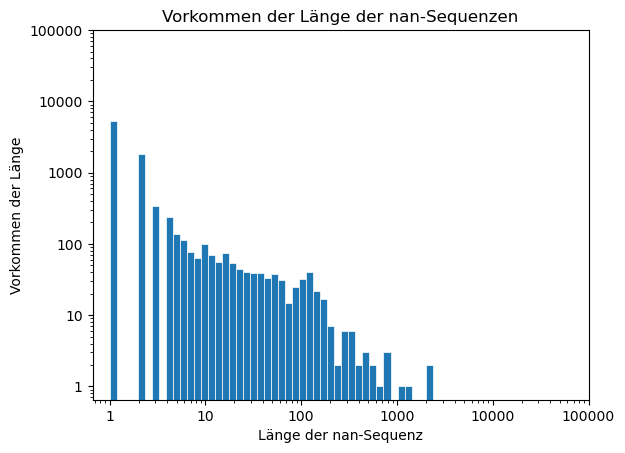

In [102]:
fig, ax = plt.subplots()

station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

bins = np.logspace(np.log10(min(station)), np.log10(max(station)), num=50)

ax.hist(station, bins=bins, linewidth=0.5, edgecolor="white")

plt.xscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
ticks = [10**i for i in range(6)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.yticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

# ax.set(xlim=(0, max(absolute_frequencies[0])),
#        ylim=(0, max(absolute_frequencies[1])))

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.show()

In [ ]:
# absolute_frequencies[0]: Lückenlänge
# absolute_frequencies[1]: Anzahl der Lücken dieser Länge

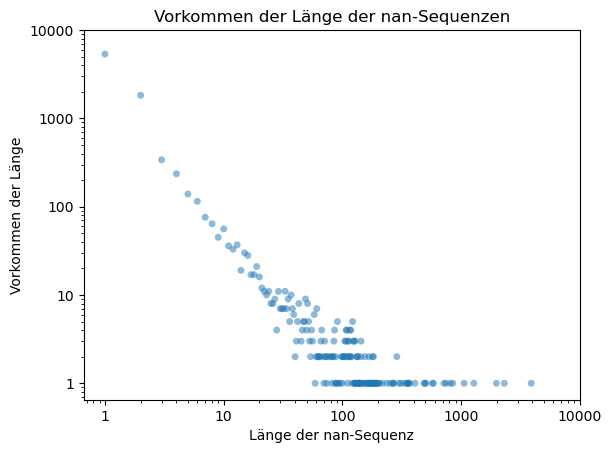

In [108]:
# make the data

station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, marker='.', alpha=0.5, edgecolors='none', s=100)

plt.xscale('log')
ticks = [10**i for i in range(5)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
plt.yticks(ticks, labels=ticks)  # Setzt die y-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.show()


In [113]:
station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# absolute_frequencies

In [121]:
groups_längen = [absolute_frequencies[0][i:i+10] for i in range(0, len(absolute_frequencies[0]), 10)]

In [131]:
groups_längen

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),
 array([41, 42, 43, 45, 46, 47, 48, 49, 50, 51]),
 array([52, 53, 54, 55, 56, 58, 59, 60, 61, 62]),
 array([63, 64, 65, 66, 67, 69, 70, 71, 72, 73]),
 array([74, 75, 79, 81, 82, 83, 84, 85, 86, 87]),
 array([ 88,  89,  90,  91,  93,  96,  98, 100, 101, 102]),
 array([104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 array([114, 115, 116, 117, 118, 120, 121, 122, 124, 125]),
 array([126, 127, 128, 129, 130, 132, 133, 134, 135, 136]),
 array([137, 138, 139, 140, 141, 143, 144, 145, 146, 152]),
 array([154, 155, 158, 163, 165, 166, 168, 170, 171, 172]),
 array([173, 179, 180, 181, 183, 184, 186, 190, 191, 194]),
 array([197, 202, 206, 218, 237, 253, 267, 268, 271, 288]),
 array([300, 311, 330, 350, 354, 356, 362, 370, 410, 489]),
 array([ 496,  509,  579,  582,  718,  750,  812,  853, 1063

In [123]:
groups_vorkommen = [absolute_frequencies[1][i:i+10] for i in range(0, len(absolute_frequencies[1]), 10)]

In [125]:
groups_vorkommen_sums = [sum(group) for group in groups_vorkommen]

In [126]:
print(groups_vorkommen_sums)

[8252, 254, 91, 71, 54, 35, 23, 20, 18, 27, 28, 15, 13, 12, 12, 11, 10, 10, 3]


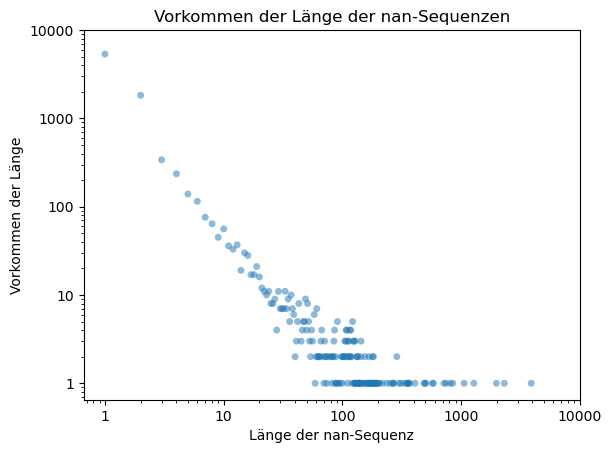

In [109]:
# make the data

station = lhg05_list

absolute_frequencies = np.unique(station, return_counts=True)

x = absolute_frequencies[0]
y = absolute_frequencies[1]

# size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, marker='.', alpha=0.5, edgecolors='none', s=100)

plt.xscale('log')
ticks = [10**i for i in range(5)]  # Erzeugt eine Liste [1, 10, 100, 1000]
plt.xticks(ticks, labels=ticks)  # Setzt die x-Achsenwerte und -Beschriftungen

plt.yscale('log')
plt.yticks(ticks, labels=ticks)  # Setzt die y-Achsenwerte und -Beschriftungen

plt.xlabel('Länge der nan-Sequenz')
plt.ylabel('Vorkommen der Länge')
plt.title('Vorkommen der Länge der nan-Sequenzen')

plt.show()


In [142]:
for i in range(1, 6):
    interval = f'{10**(i-1)} < x < {10**i}'
    print(interval, ':', sum([x for x in lhg05_list if 10**(i-1) < x < 10**i]))

1 < x < 10 : 8452
10 < x < 100 : 17433
100 < x < 1000 : 26302
1000 < x < 10000 : 10562
10000 < x < 100000 : 0
